<h3>MAGIC for single cell RNA-seq</h3>

<h4>Table of contents</h4>
<br/>
<a href='#intro'>Introduction</a>
<br/>
<a href='#data'>Loading data</a>
<br/>
<a href='#pre'>Data preprocessing</a>
<br/>
<a href='#magic'>Running MAGIC</a>
<br/>
<a href='#magic2'>Visualizing MAGIC-ed data</a>

<a id="intro"></a><h3> Introduction </h3>

This notebook details the usage of MAGIC for single cell RNA-seq data.

<a id="data"></a><h3> Loading data </h3>

MAGIC can read single cell RNA-seq data from a csv or sparse mtx file. The csv file contains cells in the rows and genes in the columns. First step is to import the package. The following code snippet imports the `magic` package along with other plotting related imports

In [1]:
import magic

# Plotting and miscellaneous imports
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


The data can be loaded using the `magic.mg.SCData.from_csv` or `magic.mg.SCData.from_mtx` functions. 

In [2]:
# Load single-cell RNA-seq data
scdata = magic.mg.SCData.from_csv(os.path.expanduser('~/Documents/Sophomore/Lab/wishbone/data/sdata_nn_TGFb_day_8_10.csv'),
                                  data_type='sc-seq', normalize=False)


This will create an object of the type `magic.mg.SCData` which is the base class for the analysis.

<a id='pca'></a>A summary of the `scdata` object is shown below

In [3]:
scdata

SCData: 7523 cells x 28909 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=None
magic=None
metadata=True
normalized=True
pca=None
tsne=None

This shows that the data matrix contains `7523` cells and `28909` genes along with the different properties of the `magic.mg.SCData` class.

The `scdata` object can also be initialized using a `pandas DataFrame`. An example is shown below <br/>
<code>
scdata = magic.mg.SCData(df, 'sc-seq')
</code>

<a id='pre'></a><h3>Data preprocessing</h3>

<h4> Filter and normalize data </h4>

The first step in data processing for MAGIC is to determine the molecule per cell and molecule per gene cutoffs with which to filter the data

3.23095955575
4.40377233181


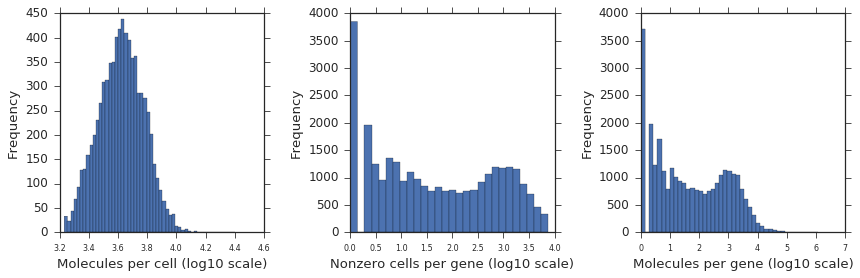

In [4]:
fig, ax = scdata.plot_molecules_per_cell_and_gene()

From these histograms, choose the appropriate cutoffs to filter the data. In this case, the data has already been filtered.

In [ ]:
# Minimum molecules/cell value
CELL_MIN = 0

# Maximum molecules/cell values
CELL_MAX = 1000000

# Minimum number of nonzero cells/gene 
# (None if no filtering desired)
GENE_NONZERO = None

# Minimum number of molecules/gene
# (None if no filtering desired)
GENE_MOLECULES = None

In [ ]:
scdata.filter_scseq_data(filter_cell_min=CELL_MIN, filter_cell_max=CELL_MAX, 
                         filter_gene_nonzero=GENE_NONZERO, filter_gene_mols=GENE_MOLECULES)

Next, we will normalize the data by dividing each cell by its molecule count and multiplying the counts of cells by the median of the molecule counts.

In [3]:
scdata = scdata.normalize_scseq_data()

<h4> Saving SCData object </h4>

The `SCData` object can be saved to a pickle file and loaded using the `save` and `load` functions.
<code>
scdata.save('scdata.p')
scdata = magic.mg.SCdata.load('scdata.p')
</code>

<a id="magic"></a><h3> Running MAGIC </h3>

When running MAGIC, a number of parameters can be specified.

In [4]:
# MAGIC
scdata.run_magic(n_pca_components=20, random_pca=True, t=6, knn=30, 
                 knn_autotune=10, epsilon=1, rescale_percent=99)

Autotuning distances
MAGIC: L_t = L^t
MAGIC: data_new = L_t * data


<a id="magic2"></a><h3> Visualizations </h3>

<h4>2D scatter plot before MAGIC:</h4>

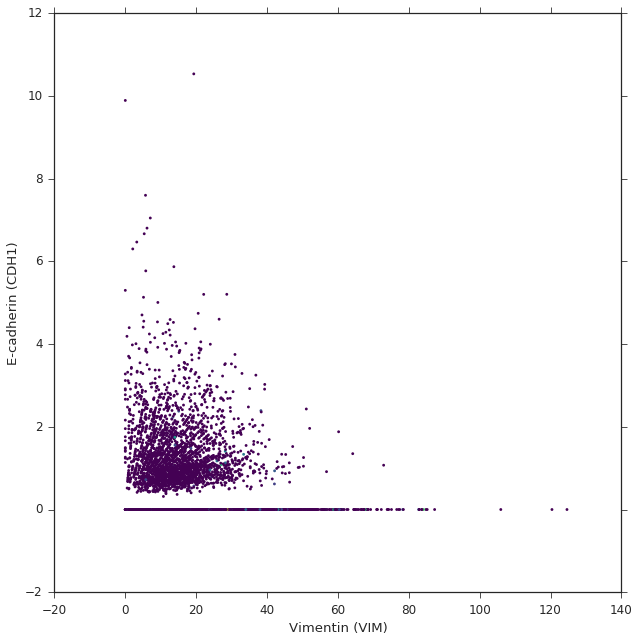

In [5]:
fig, ax = scdata.scatter_gene_expression(['VIM', 'CDH1'], color='ZEB1')
ax.set_xlabel('Vimentin (VIM)')
ax.set_ylabel('E-cadherin (CDH1)')

<h4>2D scatter plot after MAGIC:</h4>

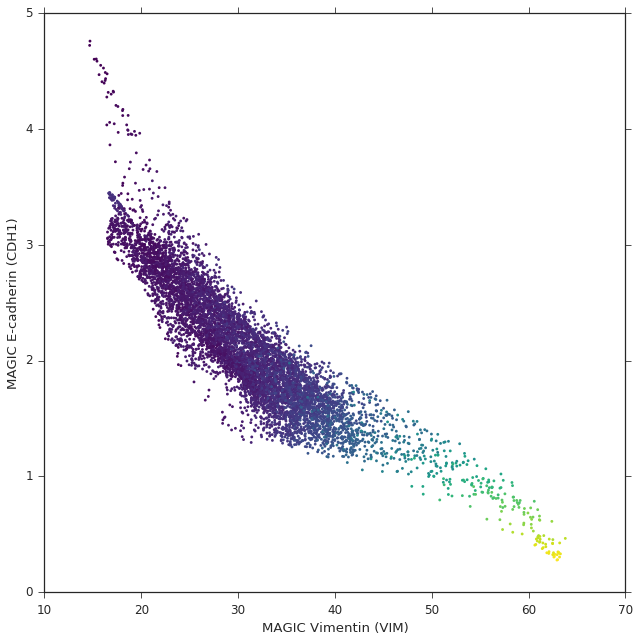

In [23]:
fig, ax = scdata.magic.scatter_gene_expression(['VIM', 'CDH1'], color ='ZEB1')
ax.set_xlabel('MAGIC Vimentin (VIM)')
ax.set_ylabel('MAGIC E-cadherin (CDH1)')

<h4>3D scatter plot before MAGIC</h4>

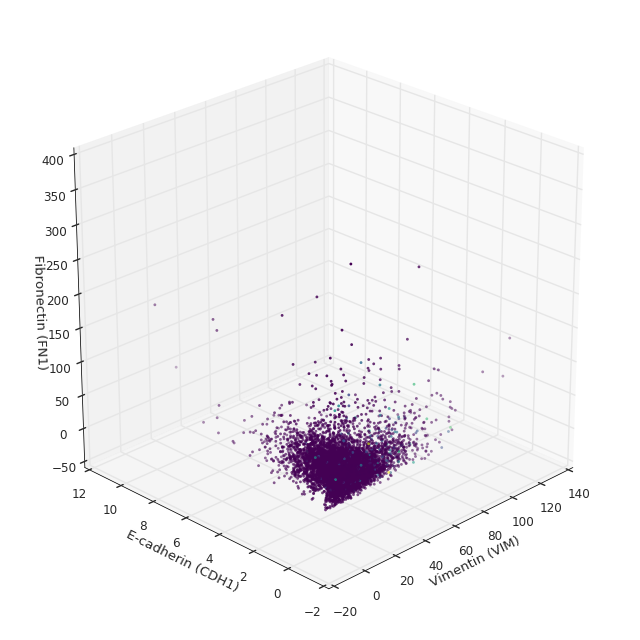

In [16]:
fig, ax = scdata.scatter_gene_expression(['VIM', 'CDH1', 'FN1'], color='ZEB1')
ax.set_xlabel('Vimentin (VIM)')
ax.set_ylabel('E-cadherin (CDH1)')
ax.set_zlabel('Fibronectin (FN1)')

<h4>3D scatter plot after MAGIC</h4>

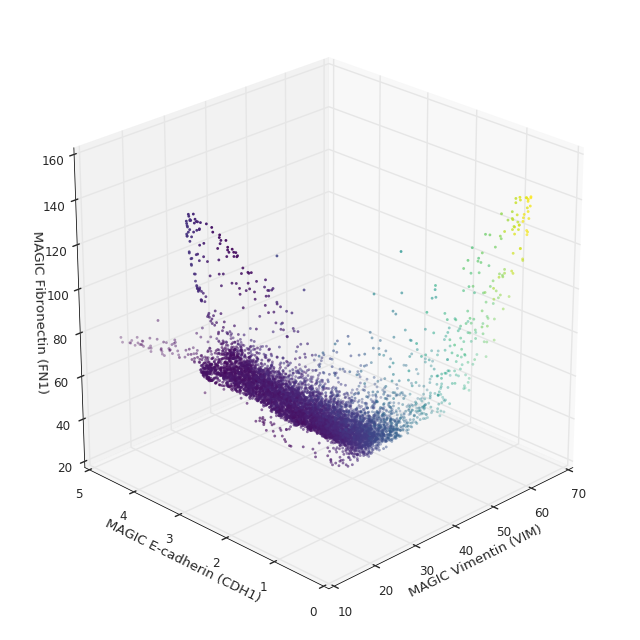

In [17]:
fig, ax = scdata.magic.scatter_gene_expression(['VIM', 'CDH1', 'FN1'], color='ZEB1')
ax.set_xlabel('MAGIC Vimentin (VIM)')
ax.set_ylabel('MAGIC E-cadherin (CDH1)')
ax.set_zlabel('MAGIC Fibronectin (FN1)')

<h4>tSNE map colored by ZEB1 expression (before MAGIC):</h4>

In [5]:
scdata.run_tsne()

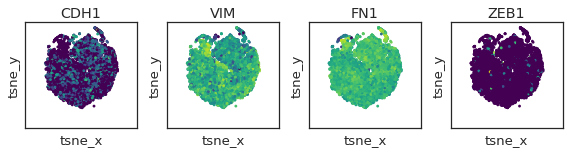

In [6]:
fig, ax = scdata.plot_gene_expression(genes=['CDH1', 'VIM', 'FN1', 'ZEB1'])

<h4>tSNE map colored by ZEB1 expression (after MAGIC):</h4>

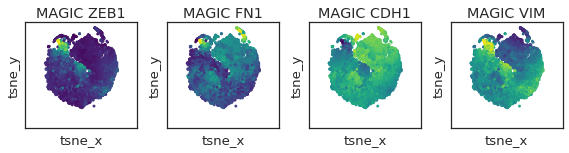

In [7]:
colors = {'MAGIC CDH1': scdata.magic.data['CDH1'],
          'MAGIC VIM': scdata.magic.data['VIM'],
          'MAGIC FN1': scdata.magic.data['FN1'],
          'MAGIC ZEB1': scdata.magic.data['ZEB1']}
fix, ax = scdata.plot_gene_expression(genes=colors)